In [2]:
import pandas as pd

In [3]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
#import pandas_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier

In [4]:
data = pd.read_csv('/content/Processed_Heart_Data.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,154.188105,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.000000,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.000000,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.000000,0,0.8,2,0,2,1
4,57,0,0,120.0,354.0,0,1,154.188105,1,0.6,2,0,2,1


In [5]:
y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [6]:
print(y_test.unique())
Counter(y_train)

[1 0]


Counter({1: 315, 0: 224})

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

confussion matrix
[[35 17]
 [ 7 76]]


Accuracy of Logistic Regression: 82.22222222222221 

              precision    recall  f1-score   support

           0       0.83      0.67      0.74        52
           1       0.82      0.92      0.86        83

    accuracy                           0.82       135
   macro avg       0.83      0.79      0.80       135
weighted avg       0.82      0.82      0.82       135



In [9]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

confussion matrix
[[38 14]
 [15 68]]


Accuracy of Naive Bayes model: 78.51851851851852 

              precision    recall  f1-score   support

           0       0.72      0.73      0.72        52
           1       0.83      0.82      0.82        83

    accuracy                           0.79       135
   macro avg       0.77      0.78      0.77       135
weighted avg       0.79      0.79      0.79       135



In [10]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[41 11]
 [11 72]]


Accuracy of Random Forest: 83.7037037037037 

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        52
           1       0.87      0.87      0.87        83

    accuracy                           0.84       135
   macro avg       0.83      0.83      0.83       135
weighted avg       0.84      0.84      0.84       135



In [11]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27,
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[ 0 52]
 [ 0 83]]


Accuracy of Extreme Gradient Boost: 61.48148148148148 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.61      1.00      0.76        83

    accuracy                           0.61       135
   macro avg       0.31      0.50      0.38       135
weighted avg       0.38      0.61      0.47       135



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[40 12]
 [12 71]]


Accuracy of K-NeighborsClassifier: 82.22222222222221 

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        52
           1       0.86      0.86      0.86        83

    accuracy                           0.82       135
   macro avg       0.81      0.81      0.81       135
weighted avg       0.82      0.82      0.82       135



In [13]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[35 17]
 [ 5 78]]


Accuracy of DecisionTreeClassifier: 83.7037037037037 

              precision    recall  f1-score   support

           0       0.88      0.67      0.76        52
           1       0.82      0.94      0.88        83

    accuracy                           0.84       135
   macro avg       0.85      0.81      0.82       135
weighted avg       0.84      0.84      0.83       135



In [14]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import joblib  # For saving the model

# Train the Random Forest model
m3 = 'Random Forest Classifier'
rf = RandomForestClassifier(n_estimators=20, random_state=12, max_depth=5)
rf.fit(X_train, y_train)

# Make predictions
rf_predicted = rf.predict(X_test)

# Evaluate the model
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)

print("Confusion Matrix (Random Forest):")
print(rf_conf_matrix)
print("\n")
print(f"Accuracy of Random Forest: {rf_acc_score * 100:.2f}%\n")
print("Classification Report (Random Forest):")
print(classification_report(y_test, rf_predicted))

# Save the model to a .pkl file
joblib.dump(rf, 'random_forest_model.pkl')
print("Random Forest model saved as 'random_forest_model.pkl'")


Confusion Matrix (Random Forest):
[[41 11]
 [11 72]]


Accuracy of Random Forest: 83.70%

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        52
           1       0.87      0.87      0.87        83

    accuracy                           0.84       135
   macro avg       0.83      0.83      0.83       135
weighted avg       0.84      0.84      0.84       135

Random Forest model saved as 'random_forest_model.pkl'


In [15]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import joblib  # For saving the model

# Train the Decision Tree model
m6 = 'Decision Tree Classifier'
dt = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=6)
dt.fit(X_train, y_train)

# Make predictions
dt_predicted = dt.predict(X_test)

# Evaluate the model
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)

print("Confusion Matrix (Decision Tree):")
print(dt_conf_matrix)
print("\n")
print(f"Accuracy of Decision Tree Classifier: {dt_acc_score * 100:.2f}%\n")
print("Classification Report (Decision Tree):")
print(classification_report(y_test, dt_predicted))

# Save the model to a .pkl file
joblib.dump(dt, 'decision_tree_model.pkl')
print("Decision Tree model saved as 'decision_tree_model.pkl'")


Confusion Matrix (Decision Tree):
[[35 17]
 [ 5 78]]


Accuracy of Decision Tree Classifier: 83.70%

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.88      0.67      0.76        52
           1       0.82      0.94      0.88        83

    accuracy                           0.84       135
   macro avg       0.85      0.81      0.82       135
weighted avg       0.84      0.84      0.83       135

Decision Tree model saved as 'decision_tree_model.pkl'


In [16]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[38 14]
 [ 8 75]]


Accuracy of Support Vector Classifier: 83.7037037037037 

              precision    recall  f1-score   support

           0       0.83      0.73      0.78        52
           1       0.84      0.90      0.87        83

    accuracy                           0.84       135
   macro avg       0.83      0.82      0.82       135
weighted avg       0.84      0.84      0.83       135



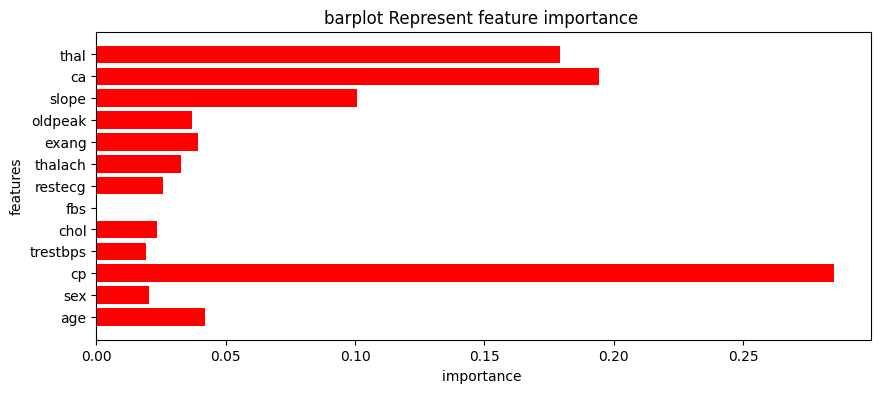

In [17]:
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': xgb.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = 'red')
plt.show()

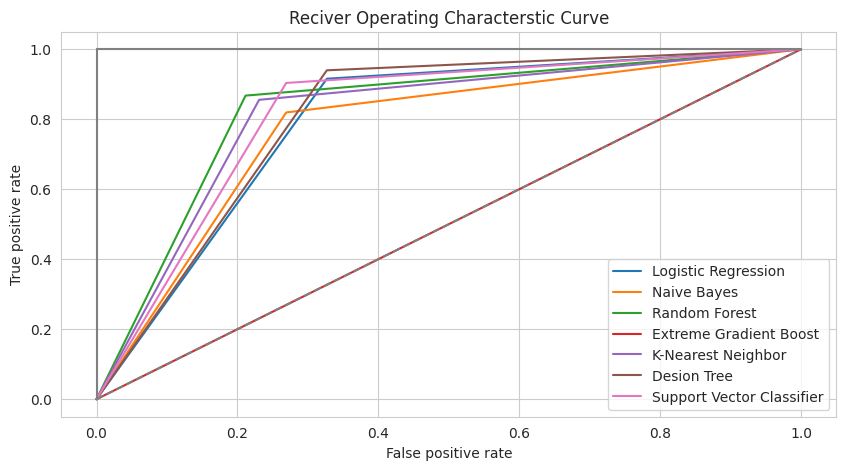

In [18]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [19]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,82.222222
1,Naive Bayes,78.518519
2,Random Forest,83.703704
3,Extreme Gradient Boost,61.481481
4,K-Nearest Neighbour,82.222222
5,Decision Tree,83.703704
6,Support Vector Machine,83.703704


In [20]:
from sklearn.metrics import recall_score, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Assuming y_test contains categorical labels, encode them
label_encoder = LabelEncoder()
encoded_y_test = label_encoder.fit_transform(y_test)

# Assuming you have predictions from your models stored in variables like lr_predict, nbpred, etc.
models = {
    'Logistic Regression': lr_predict,
    'Naive Bayes': nbpred,
    'Random Forest': rf_predicted,
    'Extreme Gradient Boost': xgb_predicted,
    'K-Nearest Neighbour': knn_predicted,
    'Decision Tree': dt_predicted,
    'Support Vector Machine': svc_predicted
}

# Create a list to store model evaluation results
model_ev = []

# Calculate accuracy and recall for each model
for model_name, predictions in models.items():
    accuracy = accuracy_score(y_test, predictions) * 100
    recall = recall_score(encoded_y_test, predictions)
    model_ev.append([model_name, accuracy, recall])

# Create DataFrame from model evaluation results
model_ev_df = pd.DataFrame(model_ev, columns=['Model', 'Accuracy', 'Recall'])

# Display the DataFrame
print(model_ev_df)

                    Model   Accuracy    Recall
0     Logistic Regression  82.222222  0.915663
1             Naive Bayes  78.518519  0.819277
2           Random Forest  83.703704  0.867470
3  Extreme Gradient Boost  61.481481  1.000000
4     K-Nearest Neighbour  82.222222  0.855422
5           Decision Tree  83.703704  0.939759
6  Support Vector Machine  83.703704  0.903614


In [21]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming y_test contains categorical labels, encode them
label_encoder = LabelEncoder()
encoded_y_test = label_encoder.fit_transform(y_test)

# Assuming you have predictions from your models stored in variables like lr_predict, nbpred, etc.
models = {
    'Logistic Regression': lr_predict,
    'Naive Bayes': nbpred,
    'Random Forest': rf_predicted,
    'Extreme Gradient Boost': xgb_predicted,
    'K-Nearest Neighbour': knn_predicted,
    'Decision Tree': dt_predicted,
    'Support Vector Machine': svc_predicted
}

# Create a list to store model evaluation results
model_ev = []

# Calculate metrics for each model
for model_name, predictions in models.items():
    accuracy = accuracy_score(encoded_y_test, predictions) * 100
    precision = precision_score(encoded_y_test, predictions, average='weighted')
    recall = recall_score(encoded_y_test, predictions, average='weighted')
    f1 = f1_score(encoded_y_test, predictions, average='weighted')

    # Store metrics in the evaluation list
    model_ev.append([model_name, accuracy, precision, recall, f1])

    # Print confusion matrix and classification report for each model
    print(f"Confusion Matrix for {model_name}:")
    print(confusion_matrix(encoded_y_test, predictions))
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(encoded_y_test, predictions))
    print("\n" + "-"*60 + "\n")

# Create DataFrame from model evaluation results
model_ev_df = pd.DataFrame(
    model_ev,
    columns=['Model', 'Accuracy (%)', 'Precision', 'Recall', 'F1 Score']
)

# Display the DataFrame
print("Model Evaluation Summary:")
print(model_ev_df)

# Optional: To display the DataFrame in a more readable format in Colab
from IPython.display import display
display(model_ev_df)


Confusion Matrix for Logistic Regression:
[[35 17]
 [ 7 76]]

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.67      0.74        52
           1       0.82      0.92      0.86        83

    accuracy                           0.82       135
   macro avg       0.83      0.79      0.80       135
weighted avg       0.82      0.82      0.82       135


------------------------------------------------------------

Confusion Matrix for Naive Bayes:
[[38 14]
 [15 68]]

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.72      0.73      0.72        52
           1       0.83      0.82      0.82        83

    accuracy                           0.79       135
   macro avg       0.77      0.78      0.77       135
weighted avg       0.79      0.79      0.79       135


------------------------------------------------------------

Confusion Matrix f

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

,Model,Accuracy (%),Precision,Recall,F1 Score
0,Logistic Regression,82.222222,0.823417,0.822222,0.817816
1,Naive Bayes,78.518519,0.786017,0.785185,0.785557
2,Random Forest,83.703704,0.837037,0.837037,0.837037
3,Extreme Gradient Boost,61.481481,0.377997,0.614815,0.468162
4,K-Nearest Neighbour,82.222222,0.822222,0.822222,0.822222
5,Decision Tree,83.703704,0.841832,0.837037,0.831902
6,Support Vector Machine,83.703704,0.836299,0.837037,0.834891


from matplotlib import pyplot as plt
model_ev_df['Accuracy (%)'].plot(kind='hist', bins=20, title='Accuracy (%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
model_ev_df['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
model_ev_df['Recall'].plot(kind='hist', bins=20, title='Recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
model_ev_df['F1 Score'].plot(kind='hist', bins=20, title='F1 Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
model_ev_df.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
model_ev_df.plot(kind='scatter', x='Accuracy (%)', y='Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
model_ev_df.plot(kind='scatter', x='Precision', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
model_ev_df.plot(kind='scatter', x='Recall', y='F1 Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
model_ev_df['Accuracy (%)'].plot(kind='line', figsize=(8, 4), title='Accuracy (%)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
model_ev_df['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
model_ev_df['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
model_ev_df['F1 Score'].plot(kind='line', figsize=(8, 4), title='F1 Score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(model_ev_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(model_ev_df, x='Accuracy (%)', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(model_ev_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(model_ev_df, x='Precision', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(model_ev_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(model_ev_df, x='Recall', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(model_ev_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(model_ev_df, x='F1 Score', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Accuracy (%)'].plot(kind='hist', bins=20, title='Accuracy (%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Recall'].plot(kind='hist', bins=20, title='Recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='Accuracy (%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Accuracy (%)', y='Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Precision', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Recall', y='F1 Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Accuracy (%)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Accuracy (%)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Precision']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Precision')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Recall']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Recall')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['F1 Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('F1 Score')

from matplotlib import pyplot as plt
_df_13['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Accuracy (%)'].plot(kind='line', figsize=(8, 4), title='Accuracy (%)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='index', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Accuracy (%)', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Precision', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='Recall', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [23]:
# Convert the model_ev list to a DataFrame
model_ev = pd.DataFrame(model_ev, columns=['Model', 'Accuracy', 'Recall'])

# Now you can access columns using string keys
colors = ['red','green','blue','gold','silver','yellow','orange']
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'], model_ev['Accuracy'], color=colors) # This line should now work correctly
plt.show()

ValueError: 3 columns passed, passed data had 5 columns

Model Evaluation Summary:
                    Model  Accuracy (%)  Precision    Recall  F1 Score
0     Logistic Regression     82.222222   0.823417  0.822222  0.817816
1             Naive Bayes     78.518519   0.786017  0.785185  0.785557
2           Random Forest     83.703704   0.837037  0.837037  0.837037
3  Extreme Gradient Boost     61.481481   0.377997  0.614815  0.468162
4     K-Nearest Neighbour     82.222222   0.822222  0.822222  0.822222
5           Decision Tree     83.703704   0.841832  0.837037  0.831902
6  Support Vector Machine     83.703704   0.836299  0.837037  0.834891


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy (%),Precision,Recall,F1 Score
0,Logistic Regression,82.222222,0.823417,0.822222,0.817816
1,Naive Bayes,78.518519,0.786017,0.785185,0.785557
2,Random Forest,83.703704,0.837037,0.837037,0.837037
3,Extreme Gradient Boost,61.481481,0.377997,0.614815,0.468162
4,K-Nearest Neighbour,82.222222,0.822222,0.822222,0.822222
5,Decision Tree,83.703704,0.841832,0.837037,0.831902
6,Support Vector Machine,83.703704,0.836299,0.837037,0.834891


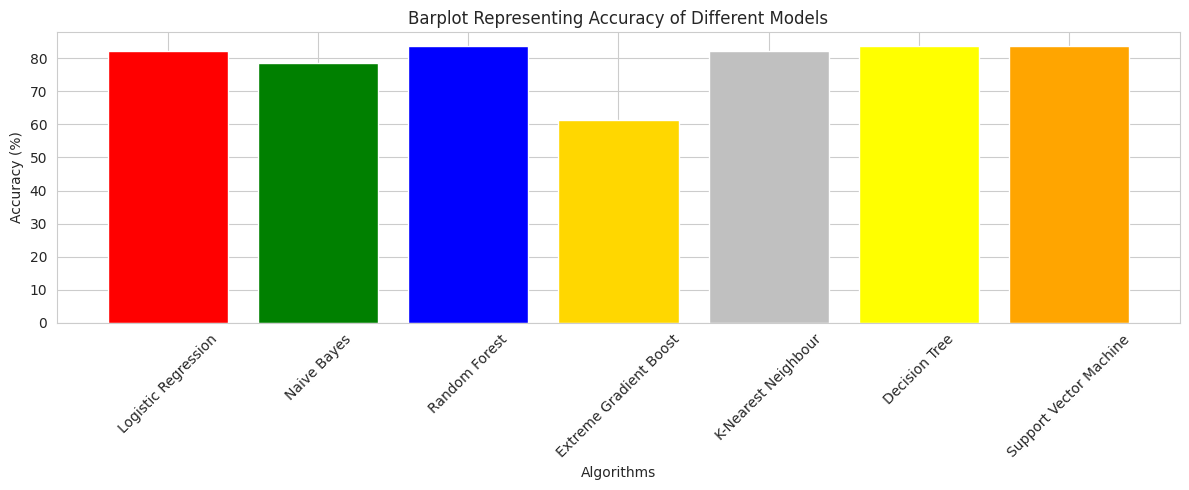

In [24]:
# Calculate metrics and store them in a list
model_ev = []

# Calculate metrics for each model
for model_name, predictions in models.items():
    accuracy = accuracy_score(encoded_y_test, predictions) * 100
    precision = precision_score(encoded_y_test, predictions, average='weighted')
    recall = recall_score(encoded_y_test, predictions, average='weighted')
    f1 = f1_score(encoded_y_test, predictions, average='weighted')

    # Store metrics in the evaluation list
    model_ev.append([model_name, accuracy, precision, recall, f1])

# Convert the model_ev list to a DataFrame
model_ev_df = pd.DataFrame(
    model_ev,
    columns=['Model', 'Accuracy (%)', 'Precision', 'Recall', 'F1 Score']
)

# Display the DataFrame
print("Model Evaluation Summary:")
print(model_ev_df)

# Optional: To display the DataFrame in a more readable format in Colab
from IPython.display import display
display(model_ev_df)

# Plot a barplot to represent the accuracy of different models
colors = ['red', 'green', 'blue', 'gold', 'silver', 'yellow', 'orange']
plt.figure(figsize=(12, 5))
plt.title("Barplot Representing Accuracy of Different Models")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy (%)")
plt.bar(model_ev_df['Model'], model_ev_df['Accuracy (%)'], color=colors)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
